<a href="https://colab.research.google.com/github/francesco-source/Machine-Learning/blob/main/Classification_22_07_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam classification 22/07/2020

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
random_state = 42
np.random.seed(random_state)

## 1. The data are split in two files, load the files and merge them  according to the first column, which is the index; both the files contain a "class" column, keep both the columns in the merged file calling them "class_x" and "class_y" (you can use the merge function of pandas dataframes)

In [97]:
df1 = pd.read_csv("exam_1.csv",index_col="Unnamed: 0")
df1 = df1.rename(columns= {"class":"class_x"})
df1.head()

,A,C,E,class_x
0,-0.386248,1.536628,1.232589,1
1,-2.686649,4.640702,0.823433,1
2,0.474124,1.576616,-1.256234,0
3,-1.343790,-0.514008,1.520392,2
4,-2.187600,0.289041,1.318321,2


In [98]:
df2 = pd.read_csv("exam_2.csv",index_col = "Unnamed: 0")
df2 = df2.rename(columns = {"class":"class_y"})
df2.head()

,B,D,F,class_y
0,-1.432057,1.039420,0.280469,1
1,-4.036329,0.526320,-0.419013,1
2,0.179770,0.157974,-0.162869,0
3,-1.299109,-0.152250,0.045123,2
4,-2.089699,-0.494995,-0.661858,2


In [99]:
df = pd.merge(df1, df2, left_index=True, right_index=True)
df.head()

,A,C,E,class_x,B,D,F,class_y
0,-0.386248,1.536628,1.232589,1,-1.432057,1.039420,0.280469,1
1,-2.686649,4.640702,0.823433,1,-4.036329,0.526320,-0.419013,1
2,0.474124,1.576616,-1.256234,0,0.179770,0.157974,-0.162869,0
3,-1.343790,-0.514008,1.520392,2,-1.299109,-0.152250,0.045123,2
4,-2.187600,0.289041,1.318321,2,-2.089699,-0.494995,-0.661858,2


## 2. Delete all the rows where class_x is different from class_y, then drop class_y and rename class_x as class

In [100]:
# Delete rows where class_x is different from class_y
df = df[df["class_x"] == df["class_y"]]

# Drop class_y column
df.drop("class_y", axis=1, inplace=True)

# Rename class_x column as class
df.rename(columns={"class_x": "class"}, inplace=True)

## 3.  Reorder the columns in alphabetical order, but placing the class column as the last one; the cleaned dataframe must be named df; show its size and head

In [101]:
cols = df.columns.tolist()
cols.remove("class")
cols.sort()
cols.append("class")
df = df[cols]
df.head()

,A,B,C,D,E,F,class
0,-0.386248,-1.432057,1.536628,1.039420,1.232589,0.280469,1
1,-2.686649,-4.036329,4.640702,0.526320,0.823433,-0.419013,1
2,0.474124,0.179770,1.576616,0.157974,-1.256234,-0.162869,0
3,-1.343790,-1.299109,-0.514008,-0.152250,1.520392,0.045123,2
4,-2.187600,-2.089699,0.289041,-0.494995,1.318321,-0.661858,2


## 4. Find the best classification scheme using three classification methods

In [102]:
X = df.drop("class",axis = 1)
y = df["class"]

X_train, X_test, y_train, y_test =train_test_split(X,y,random_state = random_state)

### DecisionTreeClassifier

In [103]:
criterions = ["gini","entropy"]
param_grid = {'max_depth': list(range(1,20)),"criterion":criterions}

dt = DecisionTreeClassifier(random_state=random_state)

dt_grid_searccv = GridSearchCV(dt,param_grid=param_grid,scoring="accuracy",cv =5)

dt_grid_searccv.fit(X_train,y_train)

dt_best = dt_grid_searccv.best_estimator_

y_dt = dt_best.predict(X_test)

In [104]:
print("The best depth is: ",dt_best.get_depth(),".")
print("The best criterion is:",dt_best.get_params()["criterion"])

The best depth is:  7 .
The best criterion is: gini


In [105]:
accuracy_dt = np.round(accuracy_score(y_test,y_dt),4)*100
print("The accuracy for the DecisionTree is: ",accuracy_dt,"%")

The accuracy for the DecisionTree is:  82.46 %


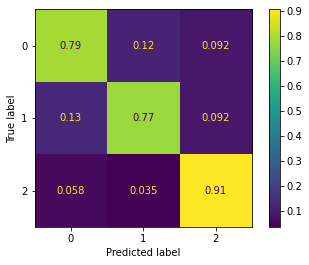

In [106]:
cfm = confusion_matrix(y_test,y_dt,normalize="true")
disp = ConfusionMatrixDisplay.from_estimator(dt_best,X_test,y_test,normalize="true");

### RandomForest 

In [107]:
rf = RandomForestClassifier(random_state=random_state)

parameters = {'max_depth':list(range(1,10)),'n_estimators':list(range(10,100,10))}

rf_grid_searccv = GridSearchCV(rf,param_grid=parameters,scoring="accuracy")

rf_grid_searccv.fit(X_train,y_train)

rf_best = rf_grid_searccv.best_estimator_

y_rf = rf_best.predict(X_test)


In [108]:
print("The best number of depth: ",rf_best.get_params()["max_depth"])
print("The best number of n_estimators: ",rf_best.get_params()["n_estimators"])

The best number of depth:  9
The best number of n_estimators:  60


In [109]:
accuracy_rf = np.round(accuracy_score(y_test,y_rf),4)*100
print("The accuracy for the DecisionTree is: ",accuracy_rf,"%")

The accuracy for the DecisionTree is:  86.69 %


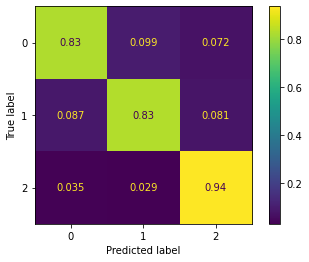

In [110]:
c_f_m = confusion_matrix(y_test,y_rf,normalize="true")
disp = ConfusionMatrixDisplay.from_estimator(rf_best,X_test,y_test,normalize="true")
print(ConfusionMatrixDisplay(c_f_m))

### KNearestNeighbour

In [111]:
knn = KNeighborsClassifier()

tuned_param_knn = [{'n_neighbors': [ 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

model = GridSearchCV(estimator = knn, param_grid=tuned_param_knn, scoring = "accuracy")

model.fit(X_train,y_train)

knn = model.best_estimator_

y_knn = knn.predict(X_test)

In [112]:
print("The best n_neighbors is:",knn.get_params()["n_neighbors"])

The best n_neighbors is: 9


In [113]:
accuracy_knn = np.round(accuracy_score(y_test,y_knn),4)*100
print("The accuracy for the DecisionTree is: ",accuracy_knn,"%")

The accuracy for the DecisionTree is:  86.29 %


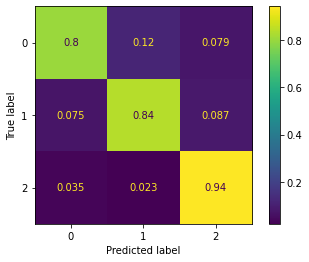

In [114]:
cfm = confusion_matrix(y_test,y_knn,normalize="true")
disp = ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test,normalize="true");

### Linear Perceptron

In [115]:
lp = Perceptron(early_stopping = True, random_state = random_state)

# Fit it to the training data
lp.fit(X_train, y_train)

# Try to predict test data
y_lp = lp.predict(X_test)


In [116]:
accuracy_lp = np.round(accuracy_score(y_test,y_lp),4)*100
print("The accuracy for the DecisionTree is: ",accuracy_lp,"%")

The accuracy for the DecisionTree is:  70.16 %


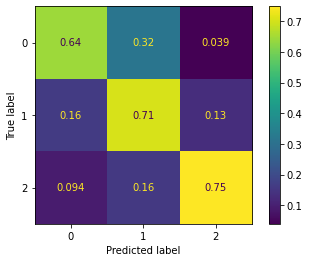

In [117]:
cfm = confusion_matrix(y_test,y_lp,normalize="true")
disp = ConfusionMatrixDisplay.from_estimator(lp,X_test,y_test,normalize="true");

For this problem the best classification model is the RandomForest because it has the highest accuracy.

## 5.  Produce a plot of the accuracies given by the methods attempted 

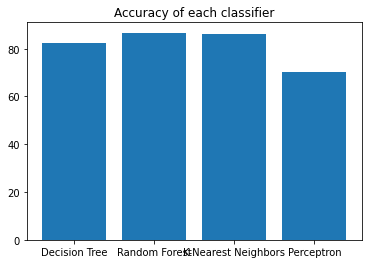

In [118]:
classifier_list = ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors',"Perceptron"]
acc_list = [accuracy_dt,accuracy_rf,accuracy_knn,accuracy_lp]
plt.title('Accuracy of each classifier')
plt.bar(classifier_list, acc_list);